# Homework 1

## Action Castle

For the first homework, we'll implement a more complicated game based on __Action Castle__, a game in the awesome book
[Parsley](http://www.memento-mori.com/parsely-products/parsely-pdf)  by Jared A. Sorensen.

Here's a map of Action Castle.

![image.png](attachment:image.png)

### Import Text Adventures

In [21]:
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

## Locations

In [22]:

cottage = things.Location(
    "Cottage",
    "You are standing in a small cottage."
)
garden_path = things.Location(
    "Garden Path",
    "You are standing on a lush garden path. There is a cottage here.",
)
fishing_pond = things.Location(
    "Fishing Pond",
    "You are at the edge of a small fishing pond."
)
winding_path = things.Location(
    "Winding Path",
    "You are walking along a winding path. There is a tall tree here.",
)
top_of_tree = things.Location(
    "Top of the Tall Tree",
    "You are the top of the tall tree."
)
drawbridge = things.Location(
    "Drawbridge",
    "You are standing on one side of a drawbridge leading to ACTION CASTLE.",
)
courtyard = things.Location(
    "Courtyard",
    "You are in the courtyard of ACTION CASTLE."
)
tower_stairs = things.Location(
    "Tower Stairs",
    "You are climbing the stairs to the tower. There is a locked door here.",
)
tower = things.Location(
    "Tower",
    "You are inside a tower."
)
dungeon_stairs = things.Location(
    "Dungeon Stairs",
    "You are climbing the stairs down to the dungeon."
)
dungeon = things.Location(
    "Dungeon",
    "You are in the dungeon. There is a spooky ghost here."
)
feasting_hall = things.Location(
    "Great Feasting Hall",
    "You stand inside the Great Feasting Hall."
)
throne_room = things.Location(
    "Throne Room",
    "This is the throne room of ACTION CASTLE."
)
death = things.Location(
    "The Afterlife",
    "You are dead. GAME OVER."
)
death.set_property("game_over", True)


# Map of Locations
cottage.add_connection("out", garden_path)
garden_path.add_connection("south", fishing_pond)
garden_path.add_connection("north", winding_path)
winding_path.add_connection("up", top_of_tree)
winding_path.add_connection("east", drawbridge)
top_of_tree.add_connection("jump", death)
drawbridge.add_connection("east", courtyard)
courtyard.add_connection("up", tower_stairs)
courtyard.add_connection("down", dungeon_stairs)
courtyard.add_connection("east", feasting_hall)
tower_stairs.add_connection("up", tower)
dungeon_stairs.add_connection("down", dungeon)
feasting_hall.add_connection("east", throne_room)



###  Preliminary Game Map

Here is a visualization of the locations in action castle represented as a directed graph.

![Visualization of game map starting from the tower](../map-from-tower.svg)

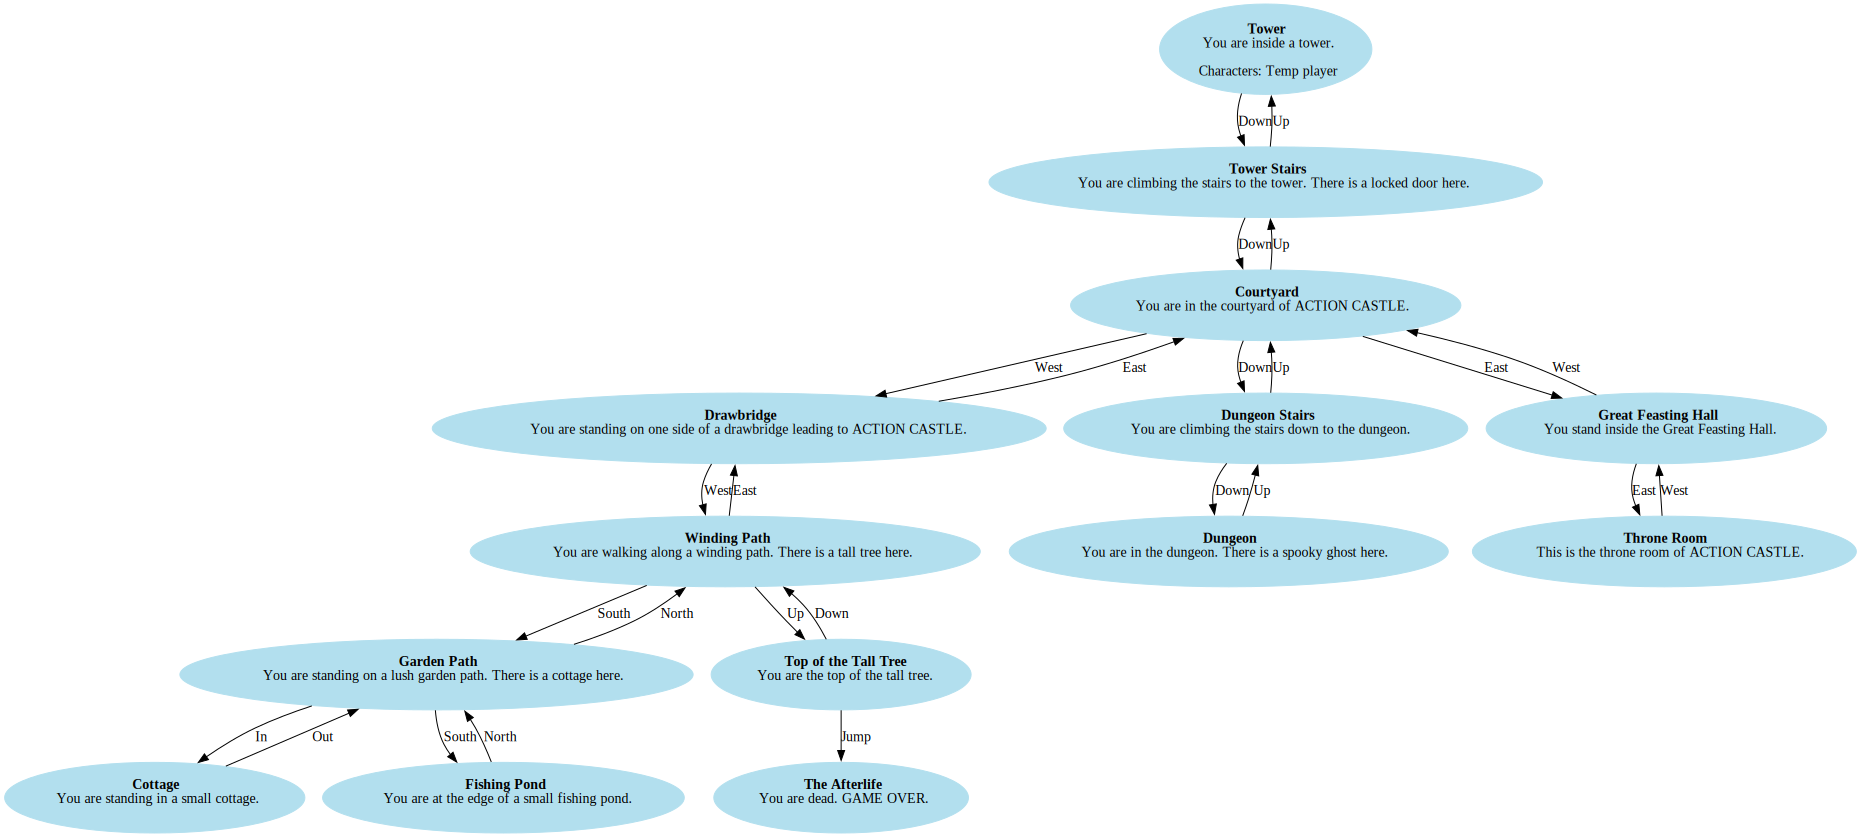

In [23]:
tempgame = games.Game(tower, things.Character(name="Temp Player", description="", persona=""))

from text_adventure_games.viz import Visualizer
viz = Visualizer(tempgame)
graph = viz.visualize()
graph

## Items

### Gettable Items

In [24]:
# Put a fishing pole at the cottage
fishing_pole = things.Item(
    "pole",
    "a fishing pole",
    "A SIMPLE FISHING POLE.",
)
cottage.add_item(fishing_pole)


# Put a branch in a tree that could be used as a weapon
branch = things.Item(
    "branch",
    "a stout, dead branch",
    "IT LOOKS LIKE IT WOULD MAKE A GOOD CLUB.",
)
branch.set_property("is_weapon", True)
branch.set_property("is_fragile", True)
top_of_tree.add_item(branch)


# Put a candle in the feasting hall
candle = things.Item(
    "candle",
    "a strange candle",
    "THE CANDLE IS COVERED IN STARGE RUNES.",
)
candle.set_property("is_lightable", True)
candle.set_property("is_lit", False)
candle.add_command_hint("light candle")
candle.add_command_hint("read runes")
feasting_hall.add_item(candle)


### Scenery Items

_We called these "non-gettable" in the tutorial_

In [25]:
# Put an actual pond at the fishing location
pond = things.Item(
    "pond",
    "a small fishing pond",
    "THERE ARE FISH IN THE POND.",
)
pond.set_property("gettable", False)
pond.set_property("has_fish", True)
pond.add_command_hint("catch fish")
pond.add_command_hint("catch fish with pole")
fishing_pond.add_item(pond)


# A nice rosebush for the garden path
rosebush = things.Item(
    "rosebush",
    "a rosebush",
    "THE ROSEBUSH CONTAINS A SINGLE RED ROSE.  IT IS BEAUTIFUL.",
)
rosebush.set_property("gettable", False)
rosebush.set_property("has_rose", True)
rosebush.add_command_hint("pick rose")
garden_path.add_item(rosebush)


# Throne room wouldn't be that impressive without a throne
throne = things.Item(
    "throne",
    "An ornate golden throne."
)
throne.set_property("gettable", False)
throne.add_command_hint("sit on throne")
throne_room.add_item(throne)


# A door that leads to the tower stairs
door = things.Item(
    "door",
    "a door",
    "THE DOOR IS SECURELY LOCKED."
)
door.set_property("gettable", False)
door.set_property("is_locked", True)
door.add_command_hint("unlock door")
tower_stairs.add_item(door)


## Characters

### Player

In [26]:
# Player
player = things.Character(
    name="The player",
    description="You are a simple peasant destined for greatness.",
    persona="I am on an adventure.",
)

# Player's lamp
lamp = things.Item("lamp", "a lamp", "A LAMself.")
lamp.set_property("is_lightable", True)
lamp.set_property("is_lit", False)
lamp.add_command_hint("light lamp")
player.add_to_inventory(lamp)


### Non-Player Characters (NPCs)

In [27]:
# A Troll at the drawbridge
troll = things.Character(
    name="troll",
    description="A mean troll",
    persona="I am hungry. The guard promised to feed me if I guard the drawbridge and keep people out of the castle.",
)
troll.set_property("is_hungry", True)
troll.set_property("character_type", "troll")
drawbridge.add_character(troll)


# A guard in the courtyard
guard = things.Character(
    name="guard",
    description="A castle guard",
    persona="I am suspicious of anyone trying to enter the castle. I will prevent keep people from entering and learning the castle's dark secrets.",
)
guard.set_property("is_conscious", True)
guard.set_property("is_suspicious", True)
guard.set_property("character_type", "human")
courtyard.add_character(guard)

# Guard has a key
key = things.Item("key", "a brass key", "THIS LOOKS USEFUL")
guard.add_to_inventory(key)

# Guard has a sword
sword = things.Item("sword", "a short sword", "A SHARP SHORT SWORD.")
sword.set_property("is_weapon", True)
guard.add_to_inventory(sword)


# A Princess in the tower
princess = things.Character(
    name="princess",
    description="A princess who is beautiful and lonely. She awaits her non-gender-stereotypical soulmate.",
    persona="I am the princess. I am grieving my father's death. I feel alone.",
)
princess.set_property("is_royal", True)
princess.set_property("emotional_state", "sad and lonely")
princess.set_property("is_married", False)
princess.set_property("character_type", "human")
tower.add_character(princess)


# A ghost in the dungeon
ghost = things.Character(
    name="ghost",
    description="A ghost with bony, claw-like fingers and who is wearing a crown.",
    persona="I was murdered by the guard. I will haunt this castle until banished. If you linger before my apparition, I will plunge my ghostly hand inside you and stop your heart",
)
ghost.set_property("character_type", "ghost")
ghost.set_property("is_dead", True)
ghost.set_property("is_banished", False)
dungeon.add_character(ghost)

# Ghost's crown
crown = things.Item("crown", "a crown", "A CROWN FIT FOR A KING.")
crown.add_command_hint("wear crown")
ghost.add_to_inventory(crown)



## Actions

Your job in this homework is to put the action in _Action Castle_! We will implement an action for each of the following:

- Unlock a door
- Read Runes
- Propose
- Wear the crown
- Sit on a throne

In [28]:
class Unlock_Door(actions.Action):
    """
    Unlocks a door in the current location using a key from the player's inventory.
    """
    ACTION_NAME = "unlock door"
    ACTION_DESCRIPTION = "Unlock a door with a key"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.game.player  # The player character
        self.door = self.find_door_in_location()  # Find the door in the player's location
        self.key = self.find_item_in_inventory("key")  # Find the key in the player's inventory

    def find_item_in_inventory(self, item_name):
        """
        Manually search the player's inventory for an item by name.
        """
        for item in self.character.inventory.values():
            if item.name == item_name:
                return item
        return None

    def find_door_in_location(self):
        """
        Manually search the current location for a door.
        """
        for item in self.character.location.items.values():
            if item.name == "door":
                return item
        return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * There must be a door in the current location.
        * The door must be locked.
        * The player must have the key in their inventory.
        """
        # Ensure the door is present in the current location
        if not self.door:
            self.parser.fail("There is no door here to unlock.")
            return False

        # Ensure the door is locked
        if not self.door.get_property("is_locked"):
            self.parser.fail("The door is already unlocked.")
            return False

        # Ensure the player has the key in their inventory
        if not self.key:
            self.parser.fail("You don't have the key to unlock the door.")
            return False

        return True

    def apply_effects(self):
        """
        Effects:
        * Unlocks the door, allowing progress.
        """
        self.door.set_property("is_locked", False)
        self.parser.ok("You unlocked the door with the key. The door swings open.")


In [29]:
class Read_Runes(actions.Action):
    """
    Reading the runes on the candle with strange runes on it will banish the
    ghost from the dungeon and cause it to drop the crown.
    """
    ACTION_NAME = "read runes"
    ACTION_DESCRIPTION = "Read runes off of the candle"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.game.player  # The player character
        self.candle = self.find_item_in_inventory("candle")  # Manually search for the candle
        self.location = self.character.location  # Get the player's current location
        self.ghost = self.find_character_in_location("ghost")  # Find the ghost manually in the location

    def find_item_in_inventory(self, item_name):
        """
        Manually search the player's inventory for an item by name.
        """
        for item in self.character.inventory.values():
            if item.name == item_name:
                return item
        return None

    def find_character_in_location(self, character_name):
        """
        Manually search the current location for a character by name.
        """
        for character in self.location.characters.values():
            if character.name == character_name:
                return character
        return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The player must have the candle in their inventory.
        * The candle must be lit.
        * The ghost must be present in the current location.
        """
        # Ensure the player has the candle in their inventory
        if not self.candle:
            self.parser.fail("You don't have the candle with runes on it.")
            return False

        # Ensure the candle is lit
        if not self.candle.get_property("is_lit"):
            self.parser.fail("The candle is not lit.")
            return False

        # Ensure the ghost is present in the current location
        if not self.ghost:
            self.parser.fail("There is no ghost here to banish.")
            return False

        return True

    def apply_effects(self):
        """
        Effects:
        * Banishes the ghost, causing it to drop its inventory.
        """
        # Banish the ghost
        self.ghost.set_property("is_banished", True)
        self.parser.ok("You read the runes aloud, and the ghost is banished! It drops its crown.")

        # Make the ghost drop its inventory into the current location
        for item in self.ghost.inventory.values():
            self.location.add_item(item)  # Ensure the dropped item (like the crown) is added to the location

        # Clear the ghost's inventory after dropping the items
        self.ghost.inventory.clear()


In [30]:
class Propose(actions.Action):
    """
    Propose marriage to a character in the same location.
    """
    ACTION_NAME = "propose to the princess"
    ACTION_DESCRIPTION = "Propose marriage to someone"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.proposer = self.game.player  # The player character
        self.propositioned = self.find_character_in_location("princess")  # The character being proposed to

    def find_character_in_location(self, character_name):
        """
        Manually search the current location for a character by name.
        """
        for character in self.proposer.location.characters.values():
            if character.name == character_name:
                return character
        return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * Both characters must be in the same location.
        * Neither character must be married yet.
        * The character being proposed to must be happy.
        """
        # Ensure the character to propose to is present in the current location
        if not self.propositioned:
            self.parser.fail("There's no one here to propose to.")
            return False

        # Ensure neither character is married
        if self.proposer.get_property("is_married") or self.propositioned.get_property("is_married"):
            self.parser.fail("One of you is already married.")
            return False

        # Ensure the propositioned character is in a happy emotional state
        if self.propositioned.get_property("emotional_state") != "happy":
            self.parser.fail(f"The {self.propositioned.name} is not in the right emotional state.")
            return False

        return True

    def apply_effects(self):
        """
        Effects:
        * Both characters are now married.
        * If one character is royal, they both become royals.
        """
        # Set the married property for both characters
        self.proposer.set_property("is_married", True)
        self.propositioned.set_property("is_married", True)

        # If the propositioned character is royal, the proposer becomes royal
        if self.propositioned.get_property("is_royal"):
            self.proposer.set_property("is_royal", True)

        # Send a message to the player about the successful proposal
        self.parser.ok(f"You propose, and the {self.propositioned.name} says yes! You are now married.")


In [31]:
class Wear_Crown(actions.Action):
    """
    Allows a character to wear the crown if they are royal.
    """
    ACTION_NAME = "wear crown"
    ACTION_DESCRIPTION = "Put a crown in your inventory atop your head"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.game.player  # The player character
        self.crown = self.find_item_in_inventory("crown")  # Find the crown in the player's inventory

    def find_item_in_inventory(self, item_name):
        """
        Manually search the player's inventory for an item by name.
        """
        for item in self.character.inventory.values():
            if item.name == item_name:
                return item
        return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The crown must be in the player's inventory.
        * The player must be a royal.
        """
        # Ensure the player has the crown in their inventory
        if not self.crown:
            self.parser.fail("You don't have the crown to wear.")
            return False

        # Ensure the player is royal
        if not self.character.get_property("is_royal"):
            self.parser.fail("Only royalty can wear the crown.")
            return False

        return True

    def apply_effects(self):
        """
        Effects:
        * The player wears the crown.
        """
        self.character.set_property("is_wearing_crown", True)
        self.parser.ok("You wear the crown. You feel regal and powerful.")


In [32]:
class Sit_On_Throne(actions.Action):
    """
    Allows a royal character to sit on the throne.
    """
    ACTION_NAME = "sit on throne"
    ACTION_DESCRIPTION = "Sit on the throne, if you are royalty"
    ACTION_ALIASES = []

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.game.player  # The player character
        self.throne = self.find_item_in_location("throne")  # Find the throne in the current location

    def find_item_in_location(self, item_name):
        """
        Manually search the current location for an item by name.
        """
        for item in self.character.location.items.values():
            if item.name == item_name:
                return item
        return None

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The throne must be in the current location.
        * The player must be royal.
        * The player must be wearing the crown.
        """
        # Ensure the throne is present in the current location
        if not self.throne:
            self.parser.fail("There is no throne here to sit on.")
            return False

        # Ensure the player is royal
        if not self.character.get_property("is_royal"):
            self.parser.fail("Only royalty can sit on the throne.")
            return False

        # Ensure the player is wearing the crown
        if not self.character.get_property("is_wearing_crown"):
            self.parser.fail("You must be wearing the crown to sit on the throne.")
            return False

        return True

    def apply_effects(self):
        """
        Effects:
        * The player sits on the throne and becomes the ruler of Action Castle.
        """
        self.character.set_property("is_reigning", True)
        self.parser.ok(f"{self.character.name} sits on the throne and is crowned ruler of Action Castle!")


## Blocks

In text adventure games, _blocks_ are essentially puzzles to unlock the next stage in the game.

We give you a `Troll_Block` for an example of what an implementation looks like.

You should implement:
* The guard block (similar to the troll block)
* The darkness block (unblocked if any character at the location is carrying
  a lit item (like a lamp or candle)
* A locked door block

In [33]:
# Sample Block

class Troll_Block(blocks.Block):
    """
    Blocks progress in this direction until the troll is no longer hungry, or
    leaves, or is unconscious, or dead.
    """

    def __init__(self, location: things.Location, troll: things.Character):
        super().__init__(
            "A troll blocks your way", "A hungry troll blocks your way"
        )
        self.location = location
        self.troll = troll

    def is_blocked(self) -> bool:
        # Conditions of block:
        # * There is a troll here
        # * The troll is alive and conscious
        # * The troll is still hungry
        if self.troll:
            if not self.location.here(self.troll):
                return False
            if self.troll.get_property("is_dead"):
                return False
            if self.troll.get_property("is_unconscious"):
                return False
            if self.troll.get_property("is_hungry"):
                return True
        return False


In [34]:
class Guard_Block(blocks.Block):
    """
    Blocks progress in this direction until the guard is no longer suspicious, 
    leaves, is unconscious, or dead.
    """

    def __init__(self, location: things.Location, guard: things.Character):
        super().__init__(
            "A guard blocks your way", "The guard refuses to let you pass."
        )
        self.location = location
        self.guard = guard

    def is_blocked(self) -> bool:
        """
        Conditions of block:
        * The guard is alive and conscious.
        * The guard is suspicious.
        """
        if self.guard:
            if not self.location.here(self.guard):
                return False
            if self.guard.get_property("is_dead") or self.guard.get_property("is_unconscious"):
                return False

            if self.guard.get_property("is_suspicious"):
                return True
        return False


In [35]:
class Darkness_Block(blocks.Block):
    """
    Blocks progress in this direction unless the character has something that lights the way.
    """

    def __init__(self, location: things.Location):
        # Initialize the block with a message saying that darkness blocks the way.
        super().__init__("Darkness blocks your way", "It's too dark to go that way.")
        self.location = location  # The location where this block applies.

    def is_blocked(self) -> bool:
        """
        Conditions of block:
        * The block is active if no character in the location has a lit item.
        * The block is lifted if any character at the location is carrying a lit item.
        """
        # Loop through all characters in the location to check for lit items.
        for character in self.location.characters.values():
            if character_has_lit_item(character):
                return False  # If a character has a lit item, the block is lifted.

        # If no character has a lit item, the block remains active.
        return True

# Helper function to check if a character has a lit item
def character_has_lit_item(character: things.Character) -> bool:
    """
    Helper function to check if the character has a lit item (like a lamp or candle).
    Returns True if the character has a lit item in their inventory, otherwise False.
    """
    for item in character.inventory.values():
        # Check if the item is lightable and currently lit.
        if item.get_property("is_lightable") and item.get_property("is_lit"):
            return True
    return False


In [36]:
class Door_Block(blocks.Block):
    """
    Blocks progress in this direction until the character unlocks the door.
    """

    def __init__(self, location: things.Location, door: things.Item):
        super().__init__("A locked door blocks your way", "The door ahead is locked.")
        self.location = location  # The location where the door is present
        self.door = door  # The door item that is being checked

    def is_blocked(self) -> bool:
        """
        Conditions of block:
        * The block is active if the door is locked.
        * The block is lifted once the door is unlocked.
        """
        # If the door is locked, the block is active
        if self.door.get_property("is_locked"):
            return True
        # If the door is unlocked, the block is lifted
        return False


In [37]:
# TODO Add blocks to location to:
# * the courtyard - the guard prevents you from going East
# * the dungeon_stairs - the darkness prevents you from going Down
# * the tower stairs - the locked door prevents you from going Up

troll_block = Troll_Block(drawbridge, troll)
drawbridge.add_block("east", troll_block)

guard_block = Guard_Block(courtyard, guard)
courtyard.add_block("east", guard_block)

# Add the darkness block to the dungeon stairs
darkness_block = Darkness_Block(dungeon_stairs)
dungeon_stairs.add_block("down", darkness_block)

door_block = Door_Block(tower_stairs, door)
tower_stairs.add_block("up", door_block)



## Play Action Castle

In [38]:
class ActionCastle(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)

    def is_won(self) -> bool:
        """
        Checks whether the game has been won. For Action Castle, the game is won
        once any character is sitting on the throne (has the property is_reigning).
        """
        for name, character in self.characters.items():
            if character.get_property("is_reigning"):
                msg = f"{character.name.title()} now reigns in ACTION CASTLE! {character.name.title()} has won the game!"
                self.parser.ok(msg)
                return True
        return False

In [39]:

characters = [troll, guard, princess, ghost]
custom_actions = [Unlock_Door, Read_Runes, Propose, Wear_Crown, Sit_On_Throne]

# The Game
game = ActionCastle(cottage, player, characters=characters, custom_actions=custom_actions)


In [40]:
game.game_loop()

You are standing in a small cottage.
Exits:
Out to Garden Path

You see:
 * a fishing pole


The player got the pole.
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


You are at the edge of a small fishing pond.
Exits:
North to Garden Path

You see:
 * a small fishing pond
        catch fish with pole
        catch fish


The player dips their hook into the pond and catches a fish
You are standing on a lush garden path. There is a cottage here.
Exits:
In to Cottage
South to Fishing Pond
North to Winding Path

You see:
 * a rosebush
        pick rose


The player picked the lone rose from the rosebush
The player smells the rose. It smells timelessly classic.
The player is happy.
You are walking along a winding path. There is a tall tree here.
Exits:
South to Garden Path
Up to Top of the Tall Tree
East to Drawbridge




You are the top of the tall tree.
Exits:
Down